---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "C:/Users/ahmed/OneDrive/CarND/data/traffic-signs-data/train.p"
validation_file= "C:/Users/ahmed/OneDrive/CarND/data/traffic-signs-data/valid.p"
testing_file = "C:/Users/ahmed/OneDrive/CarND/data/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

Let's visualize some images

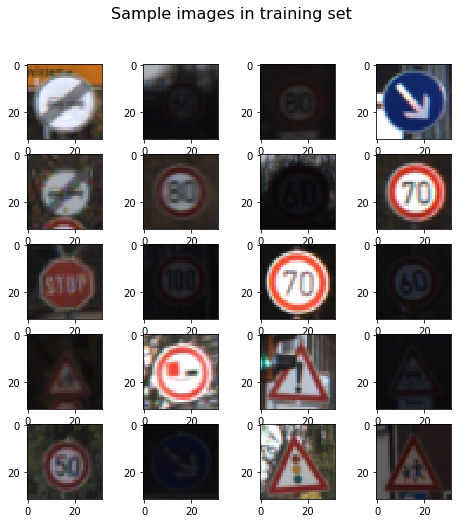

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Number of training examples
n_train = X_train.shape[0]

a = np.array(range(0, n_train))
sample = np.random.choice(a, size=20, replace=False)
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5

#plt.title("Sample images in the traffic signs data set")
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(X_train[sample[i]])
fig.suptitle("Sample images in training set", fontsize=16)
plt.show()

### Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- 'features' is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- 'labels' is a 1D array containing the label/class id of the traffic sign. The file signnames.csv contains id -> name mappings for each id.
- 'sizes' is a list containing tuples, (width, height) representing the original width and height the image.
- 'coords' is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES

### Basic Summary of the Data Set

Let's visualize the number of examples in each of training, validation and test sets. We will also look at the dimensions of an image, and the number of unique labels (i.e., how many different traffic signs there are?)

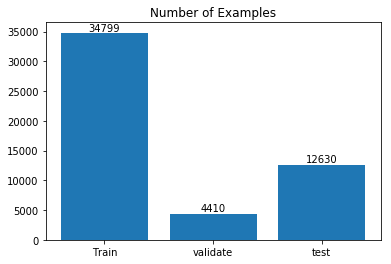

Image data shape = (32, 32)
Number of traffic signs = 43


In [7]:
import pandas as pd

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of a traffic sign image?
image_shape = X_train.shape[1:3]

# How many unique classes/labels there are in the dataset.
n_classes = len(pd.unique(y_train))

labels = [n_train, n_validation, n_test]
ax = plt.bar(['Train', 'validate', 'test'], labels)

rects = ax.patches

for rect, label in zip(rects, labels):
    plt.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 5, label,
            ha='center', va='bottom')

plt.title("Number of Examples")
plt.show()

print("Image data shape =", image_shape)
print("Number of traffic signs =", n_classes)

Now let's visualize the distribution of different traffic signs in training and validation sets.

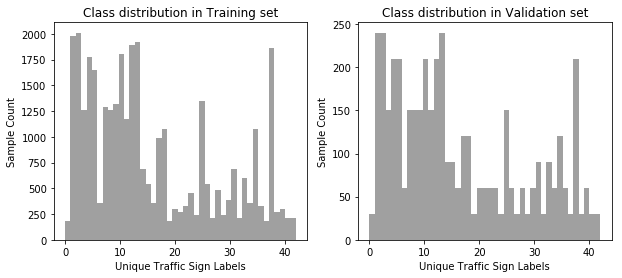

In [9]:
def plotLabelsHist(labels, title):
    classes = pd.unique(labels)
    
    plt.hist(labels, len(classes), facecolor='gray', alpha=0.75)
    plt.xlabel('Unique Traffic Sign Labels')
    plt.ylabel('Sample Count')
    plt.title(title)
    
fig=plt.figure(figsize=(10, 4))
fig.add_subplot(1,2,1)
plotLabelsHist(y_train, "Class distribution in Training set")

fig.add_subplot(1,2,2)
plotLabelsHist(y_valid, "Class distribution in Validation set")

plt.show()

We see that some traffic signs have very few examples. We will need to balance the data set. We will do that via augmentation in the next step. Here are some sample images of traffic signs with fewer than 500 examples:

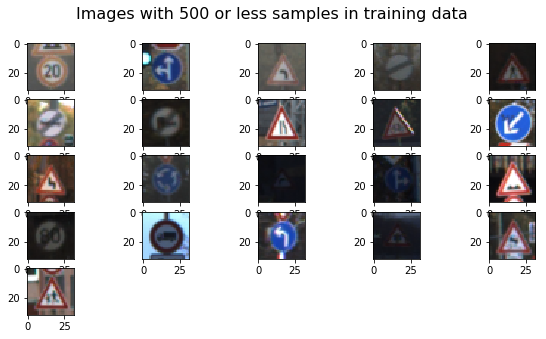

In [10]:
# Find out classes with less than 500 examples in training data...
labels, counts = np.unique(y_train,return_counts=True)
a = np.transpose(np.vstack((labels,counts)))
b = a[a[:,1].argsort()]#[:10]
b = b[b[:,1]<500]
#print(b[:10])
#print(b)
#print(len(b)) 

# 21 classes were found which had fewer than 500 samples

# Visualize a sample of each class
fig=plt.figure(figsize=(10, 5))
columns = 5
rows = 5

i=0
for j in b[:,0]:
    i = i+1
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[y_train==j][100]) #X_train[sample[i]])
fig.suptitle("Images with 500 or less samples in training data", fontsize=16)
plt.show()

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project.

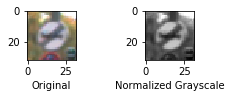

In [18]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Convert to gray scale and normalize training data
X_train_norm = np.dot(X_train, [0.299, 0.587, 0.114]).reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_train_norm = (X_train_norm - 128)/128.0

# Do the same for the the validation set
X_valid_norm = np.dot(X_valid, [0.299, 0.587, 0.114]).reshape(X_valid.shape[0],X_valid.shape[1],X_valid.shape[2],1)
X_valid_norm = (X_valid_norm - 128)/128.0

def visualizeProcessedImage(original, new, original_label, new_label, cmap_new=None):
    fig=plt.figure(figsize=(3, 3))
    fig.add_subplot(1,3,1)
    plt.imshow(original)
    plt.xlabel(original_label)
    fig.add_subplot(1,3,3)
    plt.imshow(new, cmap=cmap_new)
    plt.xlabel(new_label)
    plt.show()

visualizeProcessedImage(X_train[100], X_train_norm[100,:,:,0], "Original", "Normalized Grayscale", "gray" )

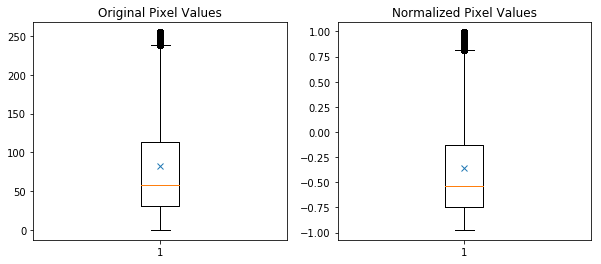

In [19]:
#print("Original max pixel value: ", np.max(X_train))
#print("Original min pixel value: ", np.min(X_train))
#print("max pixel value: ", np.max(X_train_norm))
#print("min pixel value: ", np.min(X_train_norm))
#print("mean pixel value: ", np.mean(X_train_norm))
#print("Shape of training set: ", X_train_norm.shape)

fig=plt.figure(figsize=(10, 4))
fig.add_subplot(1,2,1)
plt.boxplot(X_train.ravel())
plt.title("Original Pixel Values")
plt.plot(1,np.mean(X_train), 'x')

fig.add_subplot(1,2,2)
plt.boxplot(X_train_norm.ravel())
plt.title("Normalized Pixel Values")
plt.plot(1,np.mean(X_train_norm), 'x')

plt.show()


We can see the pixel values are normalized between -1.0 to 1.0, with both mean and median below 0. The pixel values are skewed with most of the values on the lower side which shows there are more of the darker color valued pixels, but there are enough high valued outliers near 1.0 which are pulling the mean above the median. The mean (marked by the green x) is -0.25, which is not exactly zero but this is sufficient as per project instructions.

Next I'm going to augment the data set. I will take the images for labels that have less than 500 images, tranlate them left and right and add these images to the data set.

In [20]:
# Create more images for labels with low count by translating those images left and right
X_aug = np.copy(X_train)
y_aug = np.copy(y_train)
X_train_sample = None
X_aug_sample = None
for j in b[:,0]: # for all labels in b
    X_chosen = X_train[y_train==j]
    X_trans_l = np.zeros_like(X_chosen)
    X_trans_l[:,:,:-1,:] = X_chosen[:,:,1:,:] # shift left
    X_trans_l[:,:,-1,:] = X_trans_l[:,:,-2,:] # Use constant border on the right edge.
    y_trans_l = np.zeros(X_trans_l.shape[0]) # create labels for each example in translated set
    y_trans_l = y_trans_l + j # set all labels to the original example's label
    X_trans_r = np.zeros_like(X_chosen)
    X_trans_r[:,:,1:,:] = X_trans_r[:,:,:-1,:] # shift right
    X_trans_r[:,:,0,:] = X_trans_r[:,:,1,:] # Use constant border on the Left edge.
    y_trans_r = np.zeros(X_trans_r.shape[0]) # create labels for each example in translated set
    y_trans_r = y_trans_r + j # set all labels to the original example's label
    X_aug = np.vstack((X_aug, X_trans_l, X_trans_r))
    y_aug = np.hstack((y_aug, y_trans_l, y_trans_r))
    X_train_sample = X_chosen[0]
    X_aug_sample = X_trans_l[0]

print("Augmented training set dimensions: ", X_aug.shape)
print("Augmented lables dimensions: ", y_aug.shape)

Augmented training set dimensions:  (46919, 32, 32, 3)
Augmented lables dimensions:  (46919,)


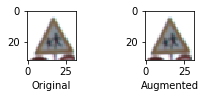

Augmented training set dimensions after grayscale conversion:  (46919, 32, 32, 1)


In [21]:
visualizeProcessedImage(X_train_sample, X_aug_sample, "Original", "Augmented")

# Convert to grayscale
X_aug_norm = np.dot(X_aug, [0.299, 0.587, 0.114]).reshape(X_aug.shape[0],X_aug.shape[1],X_aug.shape[2],1)
X_aug_norm = (X_aug_norm - 128)/128
print("Augmented training set dimensions after grayscale conversion: ", X_aug_norm.shape)

We can see that the augmented image is not so different from the original, since it has been shifted by 1 pixel only. Nevertheless, as we will see this is enough to achieve the target accuracy. Now the distribution of the labels in the data set looks better. Every label has at least 500 samples.

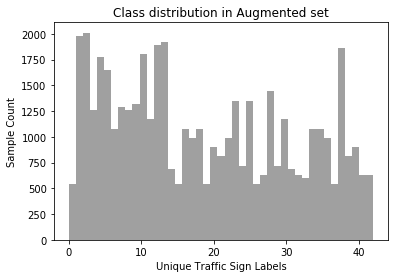

In [22]:
plotLabelsHist(y_aug, "Class distribution in Augmented set")

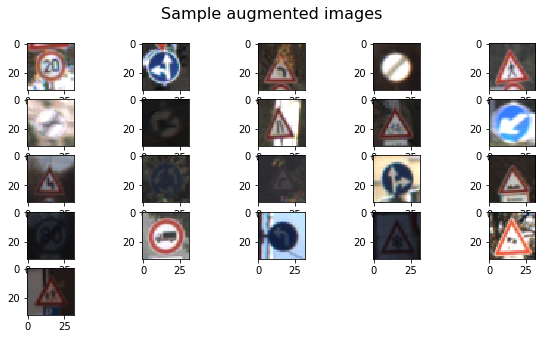

In [23]:
# Sample augmented images
i=0
fig=plt.figure(figsize=(10, 5))
for j in b[:,0]: # range(0,columns*rows):
    i = i+1
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_aug[y_aug==j][250]) #X_train[sample[i]])
fig.suptitle("Sample augmented images", fontsize=16)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Next we will build the graph for the LeNet architecture in Tensorflow.

In [24]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def LeNet(x, keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # Activation.
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # Activation.
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits, [conv1, conv2, fc1, fc2]

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

EPOCH 15: Training Accuracy = 0.873, Validation Accuracy = 0.936
Model saved


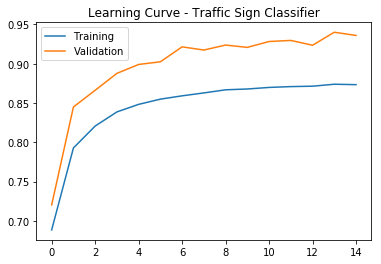

In [25]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from IPython.display import clear_output # for inplace textual updates

EPOCHS = 20
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.001

logits, layers = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    X_train2 = X_aug_norm #X_train_norm
    y_train2 = y_aug #np.copy(y_train)      #copy X_train and y_train to preserve the order of original labels 
                                     #to match the original X_train after shuffle
   
    training_curve = []
    validation_curve = []
    prev_validation_accuracy = 0
    for i in range(EPOCHS):
        X_train2, y_train2 = shuffle(X_train2, y_train2)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train2[offset:end], y_train2[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.8})
        
        training_accuracy = evaluate(X_train2, y_train2)
        training_curve.append(training_accuracy)
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        validation_curve.append(validation_accuracy)
        clear_output(wait=True)
        #display('Iteration '+str(i)+' Score: '+str(uniform(0, 1)))
        #print("EPOCH {} ...".format(i+1))
        print("EPOCH {}: Training Accuracy = {:.3f}, Validation Accuracy = {:.3f}".format(i+1, training_accuracy, validation_accuracy))
        #print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        #print()
        
        # Break loop if we achieved > 93% validation accuracy, and if current accuracy worse than previous
        if((validation_accuracy > 0.93) and (validation_accuracy < prev_validation_accuracy)):
            break
        prev_validation_accuracy = validation_accuracy
    
    try:
        saver
    except NameError:
        saver = tf.train.Saver()

    saver.save(sess, './lenet')
    print("Model saved")
    
    learning_curve_df = pd.DataFrame({'Training':training_curve, 'Validation':validation_curve})
    learning_curve_df.plot(title="Learning Curve - Traffic Sign Classifier")

The above plot shows the learning curve, and how many epochs it took to achieve the desired accuracy of above 93%. The training stops when the target accuracy is achieved and the next epoch lowers the accuracy. This is still a somewhat greedy approach, we can increase exploration further by looking at accuracies over n epochs instead of just the latest one. The learning curve also shows how the validation accuracy is improving with training. The training accuracy is low, this can be explained by the drop-out layers with a relatively high probability of 0.5. An alternate would be to add drop-outs only after each of the fully connected layers.

Let's also check the test set accuracy:

In [26]:
#Calculate and report Test set accuracy
X_test_norm = np.dot(X_test, [0.299, 0.587, 0.114]).reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_test_norm = (X_test_norm - 128)/128

with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test set accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test set accuracy = 0.915


### Confusion Matrix

Next I will introduce another tool to help analyze the model. The confusion matrix is a plot of ground truth labels against predicted labels. Below I will create and plot a confusion matrix for the validation set:

In [35]:
from sklearn.metrics import confusion_matrix
import itertools

with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "./lenet")
    prediction_op = tf.argmax(logits,1)
    predictions = sess.run(prediction_op, feed_dict={x: X_valid_norm, keep_prob: 1.0})
    cm_valid = confusion_matrix(y_valid, predictions.astype(np.int8))


INFO:tensorflow:Restoring parameters from ./lenet


Confusion matrix, without normalization


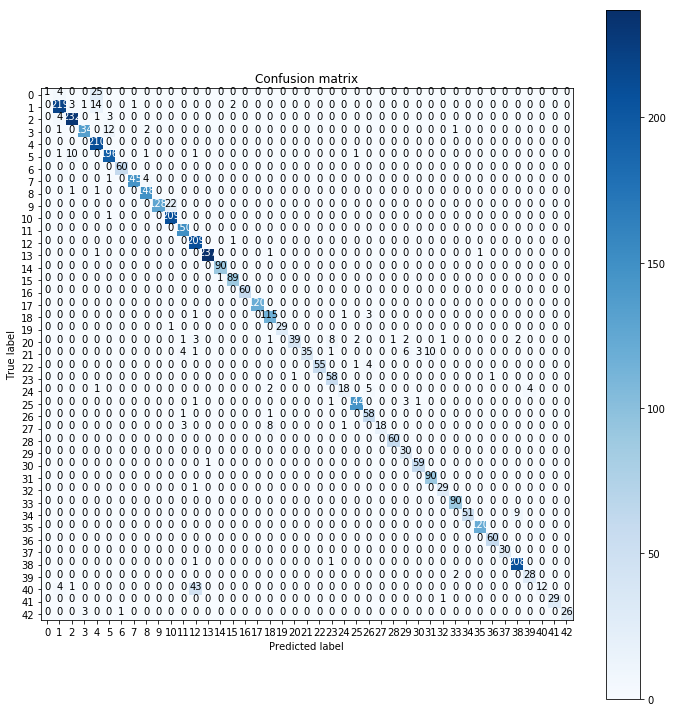

In [41]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    
    figure = plt.figure(figsize=[10,10])
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes) #, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.tight_layout()

plot_confusion_matrix(cm_valid, [c for c in range(43)], normalize=False, title='Confusion matrix')

The confusion matrix is very useful in understanding what kind of mistakes the model is making, which could help us in improving the model further, e.g. by collecting more examples of the incorrect inferences. From the plot above, we can quickly identify the higher misclassifications. The diagonals are the correct classifications. Anything with darker blue that is not on the diagonal is a candidate to explore more. For example, we see that 43 samples with True label of 40 are being misclassified as label 12. Similarly, 25 samples of True label 0 are being misclassified as label 4. Let's see samples of these images:

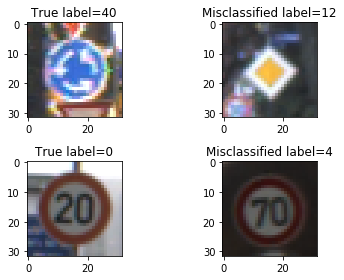

In [63]:
plt.subplot(2,2,1)
plt.imshow(X_train[y_train==40][0])
plt.title("True label=40")

plt.subplot(2,2,2)
plt.imshow(X_train[y_train==12][0])
plt.title("Misclassified label=12")

plt.subplot(2,2,3)
plt.imshow(X_train[y_train==0][50])
plt.title("True label=0")

plt.subplot(2,2,4)
plt.imshow(X_train[y_train==4][50])
plt.title("Misclassified label=4")
plt.tight_layout()


So we see that the model is confusing between speed limits 20 and 70, which makes more sense. However the top two labels look a little more surprising for the model to confuse at first. One thing we should note is that the input images are converted to grayscale, which removes much of the color info. Then perhaps the 3 arrows on the blue sign are closely resembling the diamond shape on the right. We can see what the grayscale images look like too:

Text(0.5,1,'Misclassified label=12')

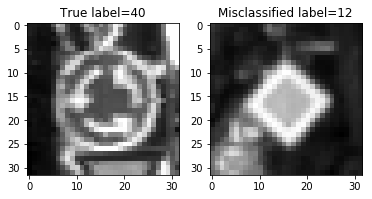

In [68]:
plt.subplot(1,2,1)
plt.imshow(X_train_norm[y_train==40][0,:,:,0], cmap="gray")
plt.title("True label=40")

plt.subplot(1,2,2)
plt.imshow(X_train_norm[y_train==12][0,:,:,0], cmap="gray")
plt.title("Misclassified label=12")

Without the color differences, we can imagine how the 3 arrows in the left image may appear to be similar to the white diamond shaped border in the right image. We also see from the confusion matrix that there are more samples of image label 40 that are misclassified, vs image label 12. So we can experiment further by adding more images of label 40, or by introducing color channels in the input. For now, I will stop at this point and move to the next step.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

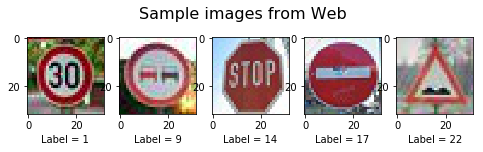

In [45]:
### Load the images and plot them here.
from PIL import Image
path = "C:/Users/ahmed/OneDrive/CarND/data/traffic-signs-from-web/"

y_web = np.array([1,9,14,17,22])
X_web = np.zeros([5,32,32,3], dtype=np.uint8)
i = 0
for l in y_web:
    img = Image.open(path + str(l) + ".jpg" )
    imgArr = np.asarray(img)
    X_web[i] = imgArr
    i += 1
fig=plt.figure(figsize=(8, 2))
columns = 5
rows = 1

for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(X_web[i])
    plt.xlabel("Label = " + str(y_web[i]))
fig.suptitle("Sample images from Web", fontsize=16)
plt.show()

#print("Sample Test Set Labels: ", y_web)

### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./lenet


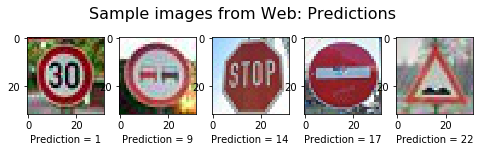

In [50]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Convert to gray scale and normalize
X_web_norm = np.dot(X_web, [0.299, 0.587, 0.114]).reshape(X_web.shape[0],X_web.shape[1],X_web.shape[2],1)
X_web_norm = (X_web_norm - 128)/128

with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "./lenet")
    prediction_op = tf.argmax(logits,1)
    predictions = sess.run(prediction_op, feed_dict={x: X_web_norm, keep_prob: 1.0})
    #print("Web image predictions", predictions)
    
    fig=plt.figure(figsize=(8, 2))

    for i in range(0, columns*rows):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(X_web[i])
        plt.xlabel("Prediction = " + str(predictions[i]))
    fig.suptitle("Sample images from Web: Predictions", fontsize=16)
    plt.show()

### Analyze Performance

In [48]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "./lenet")
    web_image_set_accuracy = evaluate(X_web_norm, y_web)
    print("Web Images Prediction Accuracy = {:.2f}%".format(web_image_set_accuracy*100))

INFO:tensorflow:Restoring parameters from ./lenet
Web Images Prediction Accuracy = 100.00%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image).

In [35]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    probs = sess.run(tf.nn.softmax(logits), feed_dict={x: X_web_norm, keep_prob: 1.0})
    top5 = sess.run(tf.nn.top_k(tf.constant(probs), k=5))
    print("Softmax Probabilities of Web Images: ")
    print(top5)

#df = pd.DataFrame(top5[0], index=['30 km/h', 'No Passing', 'Stop', 'No Entry', 'Bumpy Road'])
#print(df)
#df.plot(kind='bar')

INFO:tensorflow:Restoring parameters from ./lenet
Softmax Probabilities of Web Images: 
TopKV2(values=array([[9.9998713e-01, 1.2160443e-05, 4.2539708e-07, 1.7941383e-07,
        2.5960354e-08],
       [9.9948859e-01, 4.0420360e-04, 8.3784966e-05, 1.4949260e-05,
        6.3149919e-06],
       [8.3777577e-01, 3.4712497e-02, 3.4003150e-02, 2.9298510e-02,
        2.0334519e-02],
       [9.9999964e-01, 2.1086016e-07, 8.4939657e-08, 5.6718230e-09,
        4.9288467e-09],
       [9.9970871e-01, 1.4261818e-04, 7.5020667e-05, 6.3343075e-05,
        4.5016823e-06]], dtype=float32), indices=array([[ 1,  2,  0,  5,  7],
       [ 9, 10, 41, 12, 26],
       [14, 13, 17, 33,  2],
       [17, 34, 40, 14, 33],
       [22, 25, 29, 26, 30]]))


---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

Neural networks are very good at learning, extracting interesting features automtically. However their functionality can seem like a blackbox and it's not always easy to explain the model, which in many domains is desirable. One way to understand the network better is to visualize its inner layers. Below we will visualize the features learnt by the convolutional layers of the trainined model above.


INFO:tensorflow:Restoring parameters from ./lenet


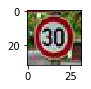

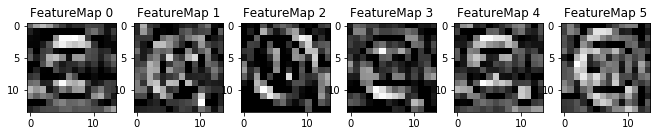

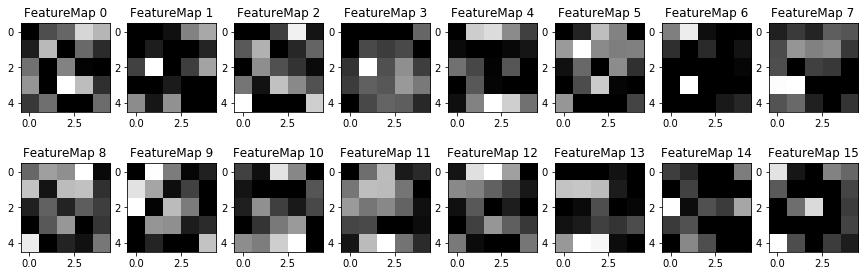

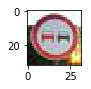

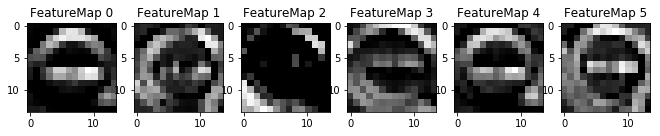

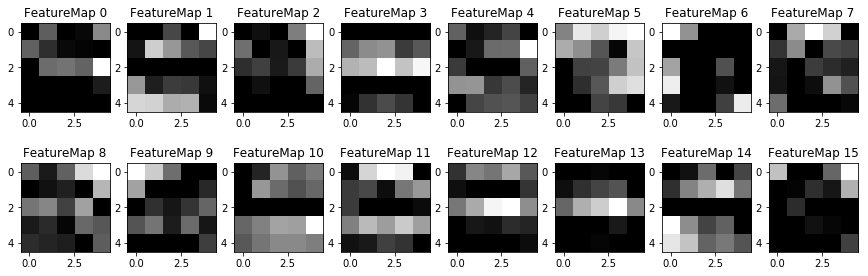

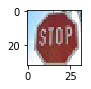

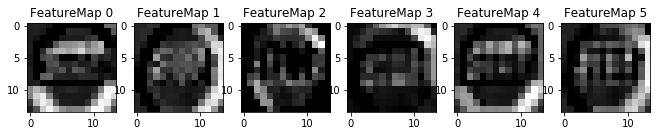

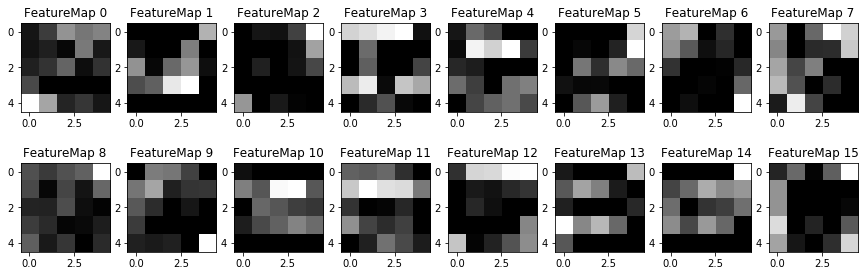

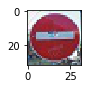

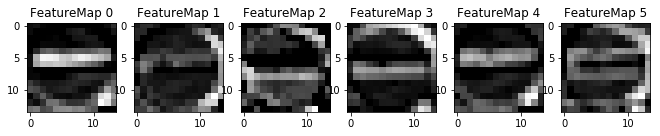

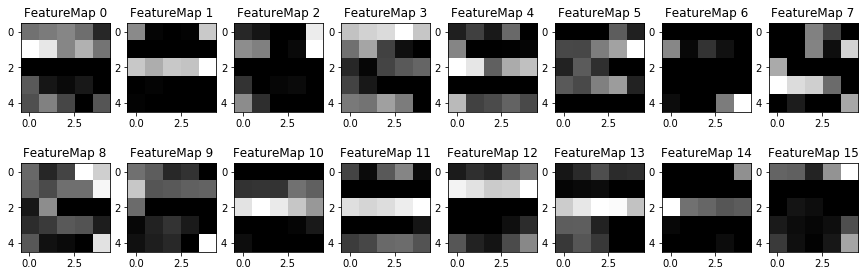

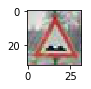

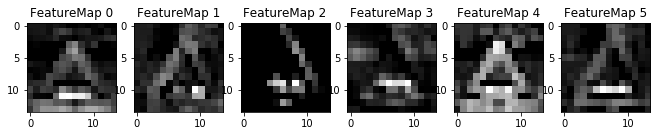

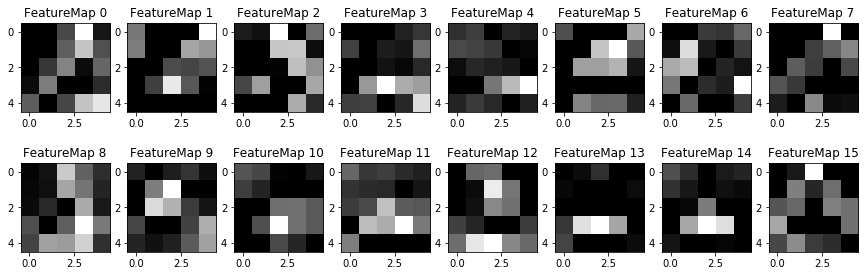

In [97]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, etc if needed
    image_input = np.dot(image_input, [0.299, 0.587, 0.114]).reshape(1, image_input.shape[0],image_input.shape[1],1)
    image_input = (image_input - 128)/128.0
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, keep_prob: 1.0})
    featuremaps = activation.shape[len(activation.shape)-1]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    for i in range(len(X_web)):
        plt.figure(figsize=(1,1))
        plt.imshow(X_web[i])
        plt.show()
        outputFeatureMap(X_web[i], layers[0])
        plt.show()
        outputFeatureMap(X_web[i], layers[1])
        plt.show()
        

The first convolutional layer images (6 features or channels) look a lot like gradients in various directions. It looks like that layer is learning to recognize these gradients, which is a useful preprocessing step in many computer vision applications.

The second convolutional layer (with 16 features) is a bit harder to explain. If we look at those features across the different signs, it looks like it is highlighting the more important or differentiating parts of the images.